In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics, decomposition
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

EDA

In [35]:
#loading data
df = pd.read_csv("/content/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [36]:
df = df.drop(['id'],axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [37]:
df = df.drop(['Unnamed: 32'],axis=1)

In [4]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


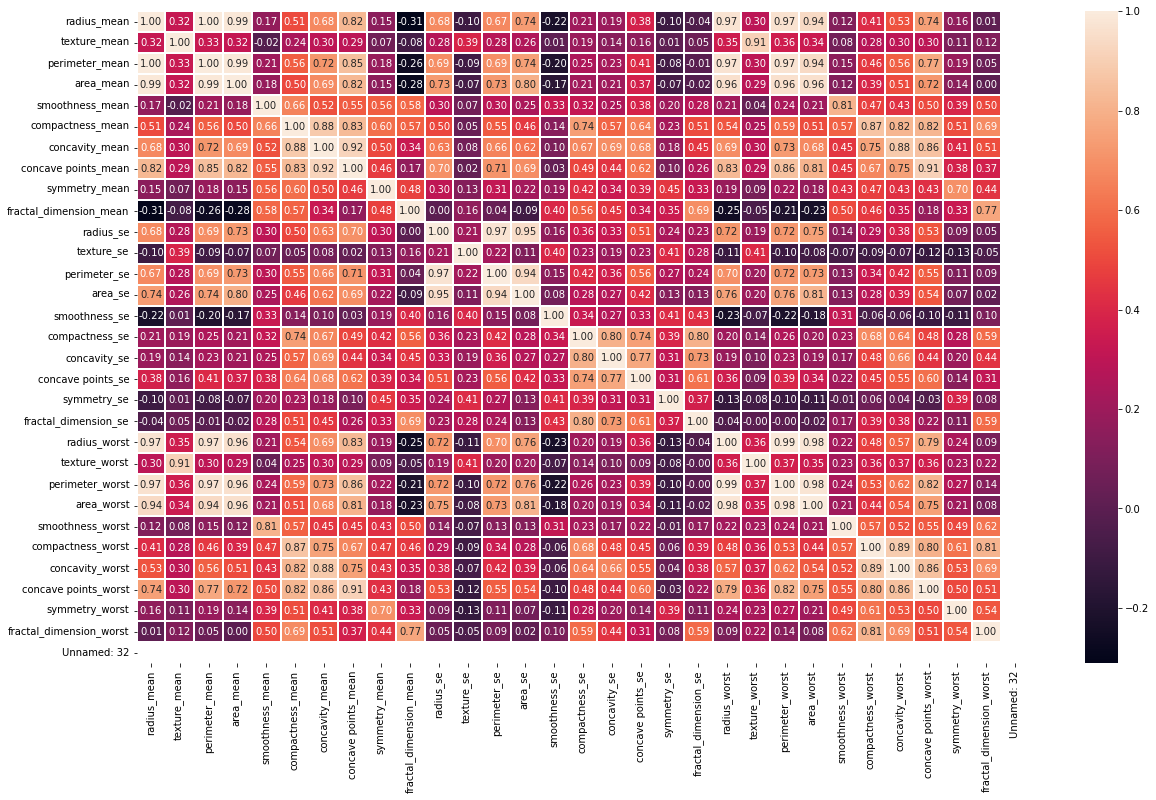

In [7]:
#correlation between all features
plt.figure(figsize = (20, 12))
corr = df.corr()
sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [52]:
#removing highly corelated features
corr_matrix = df.corr().abs() 
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.90)]
df = df.drop(to_drop, axis = 1)

In [53]:
df.shape

(569, 21)

In [54]:
Y = df["diagnosis"]
X = df.drop('diagnosis', axis=1)

In [55]:
#scaling the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [56]:
#label encoding
label_Y = LabelEncoder()
Y = label_Y.fit_transform(Y)

In [22]:
#PCA
n_components = 5
pca = decomposition.PCA(n_components=n_components)
pca.fit(X)
components = pca.transform(X)

In [23]:
columns = []
for i in range(n_components):
  columns.append(f'PC_{i+1}')

In [24]:
#feature importance
feature_importance = pd.DataFrame(pca.components_.T, index=rows, columns=columns)
feature_importance

,PC_1,PC_2,PC_3,PC_4,PC_5
smoothness_mean,0.231749,0.029707,-0.226315,-0.301459,0.289574
compactness_mean,0.323850,-0.074074,0.003800,0.004591,0.063654
symmetry_mean,0.229474,0.061742,-0.140773,-0.300389,0.027110
fractal_dimension_mean,0.221905,0.305740,-0.262968,0.075218,0.007141
texture_se,0.043104,0.267381,0.285782,-0.351113,-0.437686
area_se,0.146408,-0.210216,0.393022,-0.246915,0.256760
smoothness_se,0.086964,0.377203,0.078383,-0.268353,0.196659
compactness_se,0.279191,0.175674,0.184663,0.226843,-0.052663
concavity_se,0.244608,0.157831,0.246818,0.273336,0.000856
concave points_se,0.246660,0.101105,0.314206,0.085732,0.171792


In [27]:
#variance ratio
variance = pd.DataFrame(pca.explained_variance_ratio_.reshape(1,n_components), columns=columns)
variance

,PC_1,PC_2,PC_3,PC_4,PC_5
0,0.417505,0.15068,0.108806,0.075913,0.062505


Logistic Regression

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    components, Y, test_size=0.2, shuffle=False, random_state=0
)

In [29]:
l = LogisticRegression(random_state=0)
l.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [31]:
from sklearn import metrics
pred = l.predict(X_test)
accuracy = metrics.accuracy_score(pred, y_test)
print("The accuracy is {:.2f}".format(accuracy))

The accuracy is 0.99
